# Import Necessary Libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Merging 12 months of sales data into a single files

In [2]:
# Folder path containing all Excel files
folder_path = r"C:\Users\abhi\Desktop\Data analysis\Python Project\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

In [3]:
# Get all Excel files in the folder
files = [file for file in os.listdir(folder_path) if file.endswith('.xlsx') or file.endswith('.csv')]

print("Files found:", files)

Files found: ['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [4]:
# Create an empty list to store DataFrames
dfs = []


In [5]:
# Read and append each file's data
for file in files:
    file_path = os.path.join(folder_path, file)
    try:
        df = pd.read_csv(file_path)  # Read CSV file
        if not df.empty:  # Check if file is not empty
            dfs.append(df)
        else:
            print(f"Skipping empty file: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")  # Catch read errors

# Check if there is data to merge
if dfs:
    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df.to_csv("merged_file.csv", index=False)  # Save as CSV
    print("Merging complete! Data saved in 'merged_file.csv'.")
else:
    print("No data to merge.")

Merging complete! Data saved in 'merged_file.csv'.


In [6]:
data = pd.read_csv("merged_file.csv")

In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Clean up the Data

In [9]:
df[df.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.dropna(inplace = True) #Dropping Null Values
df.isnull().sum().sum()

0

In [11]:
# convertring Order Date in DateTime Format
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M", errors='coerce')
df.isnull().sum().sum()

355

In [12]:
df.dropna(subset= 'Order Date', inplace= True)

In [13]:
#cheack and convert proper data types
df.dtypes
df['Order Date'].isnull().sum()

0

In [14]:
df['Order ID'] = df['Order ID'].astype(int) # Change OrderID to Int
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) 
df['Price Each'] = pd.to_numeric(df['Price Each'])

In [15]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Add the Month, Month Name, Year,  Sales, City_State, Hour, Minute Columns


In [16]:
#now we are ready to extract the month from Order Date
df['Month'] = df['Order Date'].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [17]:
# Month_Name
df['Month_Name'] = df['Order Date'].dt.strftime('%B') 
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,April
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,April
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,April
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,April
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,April


In [18]:
## Year Column
df['Year'] = df['Order Date'].dt.year
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,April,2019
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,April,2019
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,April,2019
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,April,2019
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,April,2019


In [19]:
## Sales Column
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,April,2019,11.95
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,April,2019,99.99
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,April,2019,11.95
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,April,2019,1700.00
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,April,2019,11.99


City_State Column
we have to Extract City_State from the given address. 

In the Usa there is a lot of duplicate City name 
that why we are extracting City_State instade of City_State

In [20]:
#City_State Column
df['City_State'] = df['Purchase Address'].str.split(',').str[1].str.strip() + ' ' + '(' +\
                   df['Purchase Address'].str.split(',').str[2].str.strip() + ')' 


In [21]:
df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,September,2019,8.97,Los Angeles (CA 90001)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,September,2019,700.00,San Francisco (CA 94016)
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,September,2019,700.00,San Francisco (CA 94016)
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,September,2019,379.99,San Francisco (CA 94016)
186849,259357,USB-C Charging Cable,1,11.95,2019-09-30 00:18:00,"250 Meadow St, San Francisco, CA 94016",9,September,2019,11.95,San Francisco (CA 94016)


In [22]:
# Hour Column
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9


In [23]:
# Minute Column
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9,27


### 1 What was the best month for sale? and How much was earned that month?

In [24]:
df.groupby('Month')['Sales'].sum().nlargest(1) # --- Return the series 

Month
12    4613443.34
Name: Sales, dtype: float64

In [25]:
df.groupby('Month')['Sales'].sum().idxmax()  # Returns the best month
df.groupby('Month')['Sales'].sum().max()  # Returns the highest sales value

4613443.34

### 2.Total Sells Over Months in all Year

In [26]:
result = df.groupby(['Month']).sum(numeric_only= True)[['Quantity Ordered', 'Price Each', 'Sales']]
result

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


##### Now we are Plotting the Graph for that questions

Here we are Comparing Sales Across Different Months (Categorical Data)
A bar chart is ideal for comparing total sales per month, making it easy to visualize trends.

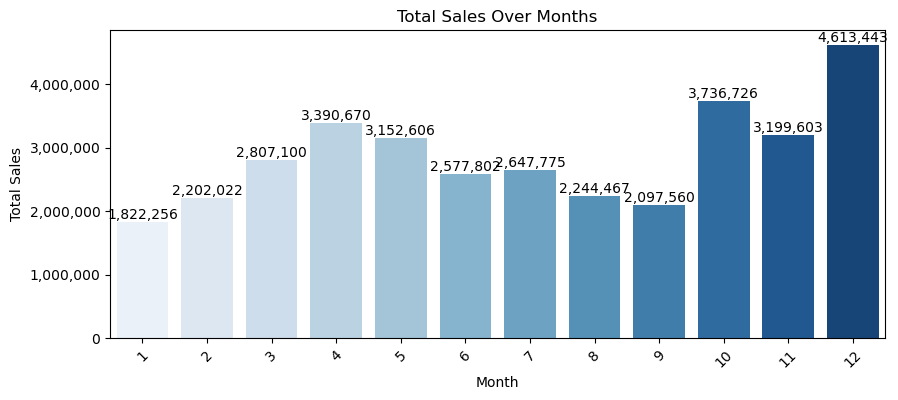

In [27]:


# Create the plot
plt.figure(figsize=(10, 4))
sns.barplot(x=result.index, y=result['Sales'], palette='Blues')

# Format the Y-axis to show proper sales values
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Months')

# Show the values on bars
for index, value in enumerate(result['Sales']):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate month labels if needed
plt.show()


In [28]:
# so as far the data is from USA and the considering why sales are doing far good in the DEC
#because of the Chrismus there poeple buying Gifts and doing shoping for the chrismus 

In [29]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9,27


### Q2). What City had the heighest number of Sales

In [30]:
result2 = df.groupby('City_State').sum(numeric_only = True)[['Sales', 'Quantity Ordered', 'Price Each']]

#### Now we are Plotting the Graph for that questions

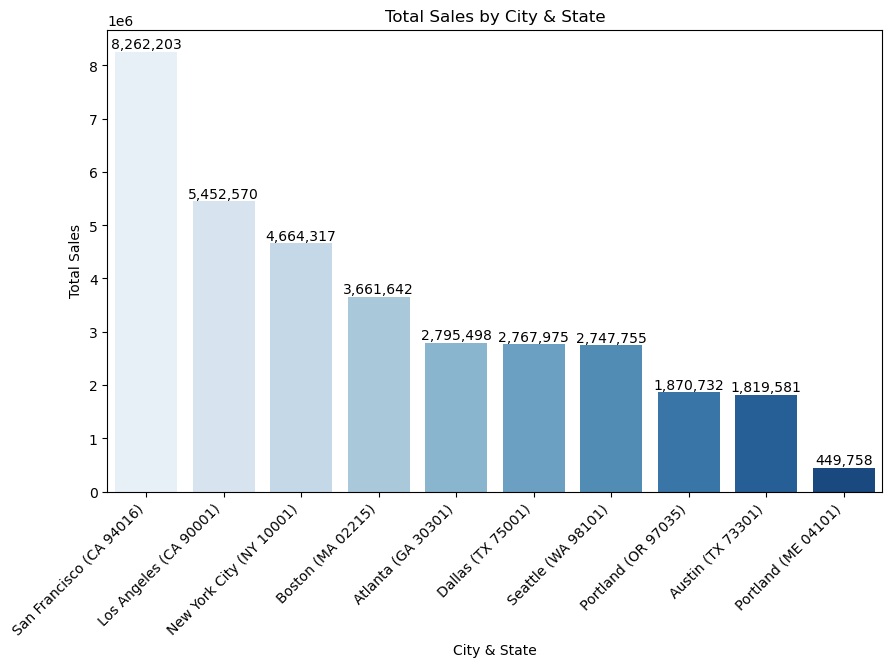

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sorting data by Sales for better visualization
result2 = result2.sort_values(by='Sales', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=result2.index, y=result2['Sales'], palette='Blues')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel('City & State')
plt.ylabel('Total Sales')
plt.title('Total Sales by City & State')

# Show values on top of bars
for index, value in enumerate(result2['Sales']):
    plt.text(index, value, f'{int(value):,}', ha='center', va='bottom', fontsize=10)

plt.show()


Insighst from the data -- San Francisco(CA 94016) are getting the best sales
so the Client should ask why he is giving the best sale

-- San Francisco(CA 94016) Siicon Vally so more electronic purcheses are there etc....like this 

###  Q3). What time should we display advertisements to maximize likelihood of customer buying products

In [38]:
df.groupby(['Hour']).count()['Order ID']

Hour
0      3910
1      2350
2      1243
3       831
4       854
5      1321
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Order ID, dtype: int64

we are using here line chart

Why Use a Line Chart?

✅ Best for trends → Easily shows peak order times.

✅ Smooth transitions → Helps track changes between consecutive hours.

✅ Clear insights → Identifies when customer activity increases or decreases.

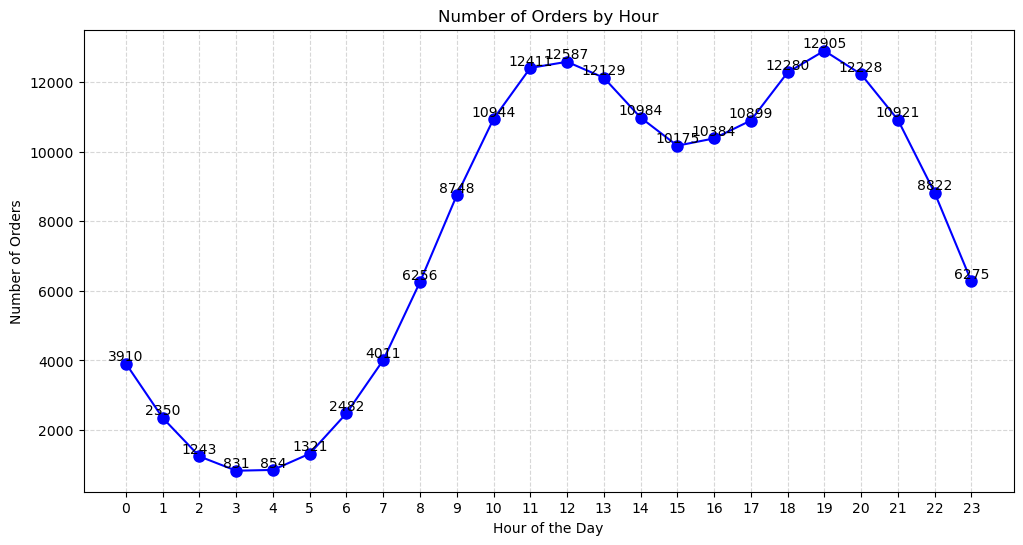

In [39]:
import matplotlib.pyplot as plt

# Aggregate orders by Hour
hourly_orders = df.groupby('Hour').count()['Order ID']

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_orders.index, hourly_orders.values, marker='o', linestyle='-', color='b', markersize=8)

# Add order count labels on each dot
for hour, count in zip(hourly_orders.index, hourly_orders.values):
    plt.text(hour, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')
plt.xticks(range(0, 24))  # Show all hours (0-23)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability

# Show the graph
plt.show()


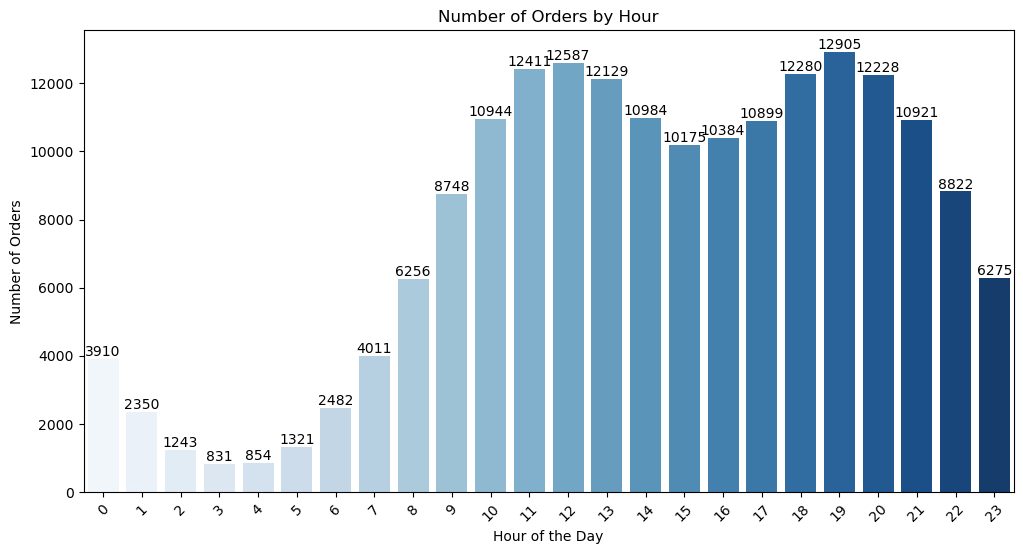

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate orders by Hour
hourly_orders = df.groupby('Hour').count()['Order ID']

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette='Blues')

# Labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour')

# Show values on top of bars
for index, value in enumerate(hourly_orders.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


####  Sales per hour 

In [41]:
hourly_sales  = df.groupby('Hour').sum(numeric_only= True)['Sales']

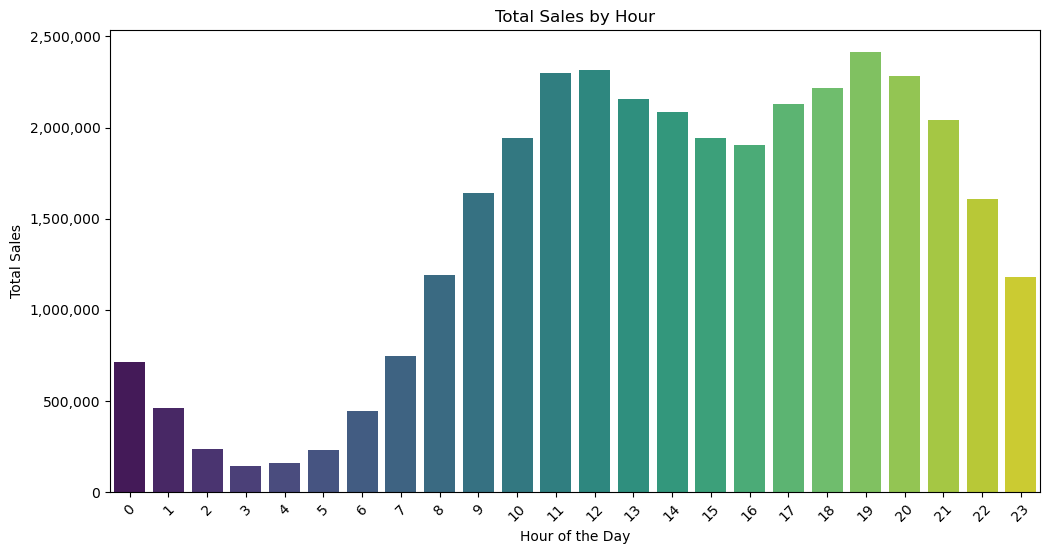

In [42]:
plt.figure(figsize=(12, 6))
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='viridis')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.xticks(rotation=45)
plt.show()

we are doing here A/B testing that when the customer activation is more 
based on that we will show ads on shifts Mor, Aft, Eve, Night
then cheack which

What time should we display advertisements to maximize likelihood of customer buying products

we are calculating here the timing zone i.e 

🌅 Morning 06:00 AM – 11:59 AM (06:00 – 11:59)

🌞 Afternoon 12:00 PM – 05:59 PM (12:00 – 17:59)

🌆 Evening 06:00 PM – 11:59 PM (18:00 – 23:59)

🌙 Night 12:00 AM – 05:59 AM (00:00 – 05:59)



In [51]:
# Define function to categorize time zones
def categorize_time(hour):
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 24:
        return "Evening"
    else:
        return "Night"

In [52]:
# Apply the function to create a new 'Time Zone' column
df['Time Zone'] = df['Hour'].apply(categorize_time)


In [53]:
# Count number of orders per time zone
time_zone_counts = df['Time Zone'].value_counts()
time_zone_counts

Time Zone
Afternoon    67158
Evening      63431
Morning      44852
Night        10509
Name: count, dtype: int64

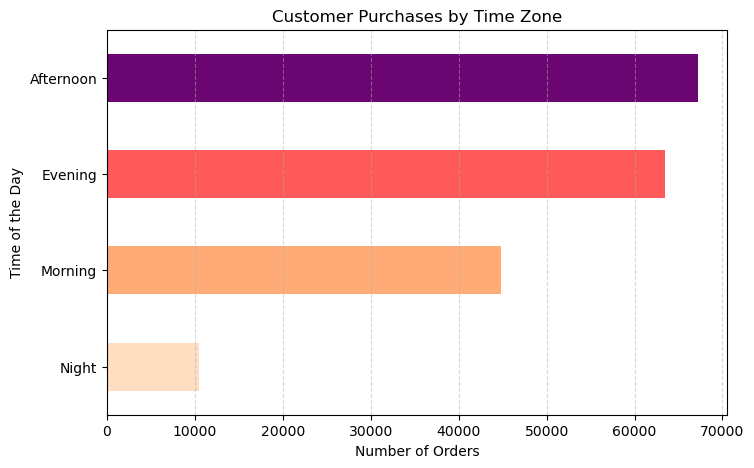

In [54]:
# Plot the results
plt.figure(figsize=(8, 5))
time_zone_counts.sort_values().plot(kind='barh', color=['#FFDDC1', '#FFAB76', '#FF5959', '#6A0572'])
plt.xlabel("Number of Orders")
plt.ylabel("Time of the Day")
plt.title("Customer Purchases by Time Zone")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


### best time zone for advertisements

In [55]:
best_time_zone = time_zone_counts.idxmax()
print(f"📢 The best time to display advertisements is: {best_time_zone}")

📢 The best time to display advertisements is: Afternoon


Insights

we should spend more on showing advertisements at Afternoon and Evening Cause at that time the Customer is very Active on our site to Buying Products 


and Less active on our site to buy a product at Morning and night

### Question 4: What products are most often sold together

In [70]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8,46,Morning
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22,30,Evening
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9,27,Morning


In [58]:
df1 = df[df['Order ID'].duplicated(keep = False)]
df1.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),19,42,Evening
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,11.95,Los Angeles (CA 90001),19,42,Evening
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,5.98,San Francisco (CA 94016),17,0,Afternoon
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,600.00,San Francisco (CA 94016),17,0,Afternoon
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,14.95,New York City (NY 10001),11,7,Morning
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,11.95,New York City (NY 10001),11,7,Morning


we need the products buyed by the same order id in one column

In [59]:
df1['Grouped_Products'] = df1.groupby('Order ID')['Product'].transform(lambda X: ','.join(X))
df1.head(10)

C:\Users\abhi\AppData\Local\Temp\ipykernel_15436\331459155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped_Products'] = df1.groupby('Order ID')['Product'].transform(lambda X: ','.join(X))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone,Grouped_Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),19,42,Evening,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,11.95,Los Angeles (CA 90001),19,42,Evening,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,5.98,San Francisco (CA 94016),17,0,Afternoon,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,600.00,San Francisco (CA 94016),17,0,Afternoon,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,14.95,New York City (NY 10001),11,7,Morning,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,11.95,New York City (NY 10001),11,7,Morning,"Lightning Charging Cable,USB-C Charging Cable"


In [60]:
df1.groupby('Order ID')

In [61]:
df1[['Order ID', 'Grouped_Products']].drop_duplicates(inplace = True)
df1.head(10)


C:\Users\abhi\AppData\Local\Temp\ipykernel_15436\122194664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Order ID', 'Grouped_Products']].drop_duplicates(inplace = True)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone,Grouped_Products
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),19,42,Evening,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,April,2019,11.95,Los Angeles (CA 90001),19,42,Evening,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),11,31,Morning,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,5.98,San Francisco (CA 94016),17,0,Afternoon,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,April,2019,600.00,San Francisco (CA 94016),17,0,Afternoon,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,14.95,New York City (NY 10001),11,7,Morning,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,April,2019,11.95,New York City (NY 10001),11,7,Morning,"Lightning Charging Cable,USB-C Charging Cable"


In [62]:
#here we took little help of stackoverflow and chatgpt

from itertools import combinations
from collections import Counter
count = Counter()
for row in df1['Grouped_Products']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) #-- increase the number you will see the most comman ordered products together  
count.most_common(10) # 10 most comonly ordered products together
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 271
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 193
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 146
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 109
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 101
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 86
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 75
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 50
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 20
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 17


Insights :

Here we got the most common produts order together 

You can simply make a combo of that orders and give a discount on it that people can order it more

also you can maintain the stock while buying these products together 

### Question 5: What product sold the most ? Why do you think it sold the most ? 

In [63]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8,46,Morning
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22,30,Evening
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9,27,Morning
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,April,2019,11.95,San Francisco (CA 94016),13,3,Afternoon
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,April,2019,99.99,Seattle (WA 98101),7,46,Morning
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",4,April,2019,11.95,Atlanta (GA 30301),10,58,Morning
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,April,2019,1700.00,San Francisco (CA 94016),10,38,Morning
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",4,April,2019,11.99,Boston (MA 02215),14,5,Afternoon


In [64]:
df.groupby('Product')['Quantity Ordered'].sum().nlargest(1)


Product
AAA Batteries (4-pack)    31017
Name: Quantity Ordered, dtype: int64

In [65]:
df['Product'].nunique()

19

Lets Plot the graph for this 

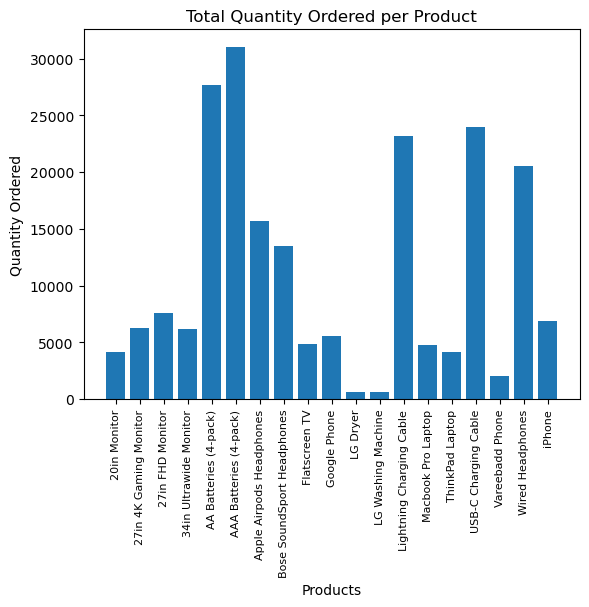

In [66]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only = True)['Quantity Ordered']
products = [product for product, df in product_group]
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.title("Total Quantity Ordered per Product")
plt.xticks(products, rotation= 'vertical', size = 8)
plt.show()

Insights 

what item sold the most?

so using the bar graph we can see here that the Batteries are getting sold the most and LG Dryer getting sold very less

Why do you think it sold the most ? 

To give ans of these question we should have a good knowladge about these products and their use cases 

we can say here that the Batteries are cheaper than the most of the products like LG Dryer who buy the less
but as a good data analyst its always good to be prove our hypothesis


so lets check their prices

#### Proving Hypothesis that why people buy Batteries more that other products 
###### Hypothesis : 
###### 1. "Batteries are the most frequently purchased product compared to other items."
###### 2. "LG Dryers are among the least frequently purchased products."

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month_Name,Year,Sales,City_State,Hour,Minute,Time Zone
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,April,2019,23.90,Dallas (TX 75001),8,46,Morning
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,April,2019,99.99,Boston (MA 02215),22,30,Evening
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,600.00,Los Angeles (CA 90001),14,38,Afternoon
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),14,38,Afternoon
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,April,2019,11.99,Los Angeles (CA 90001),9,27,Morning


In [68]:
#Prices of each prducts 
Price = df.groupby('Product').mean(numeric_only=True)['Price Each']
Price

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

Now we have to get these prices of all products on the grph as a another Y Axis 

C:\Users\abhi\AppData\Local\Temp\ipykernel_15436\4178701872.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical', size =8)


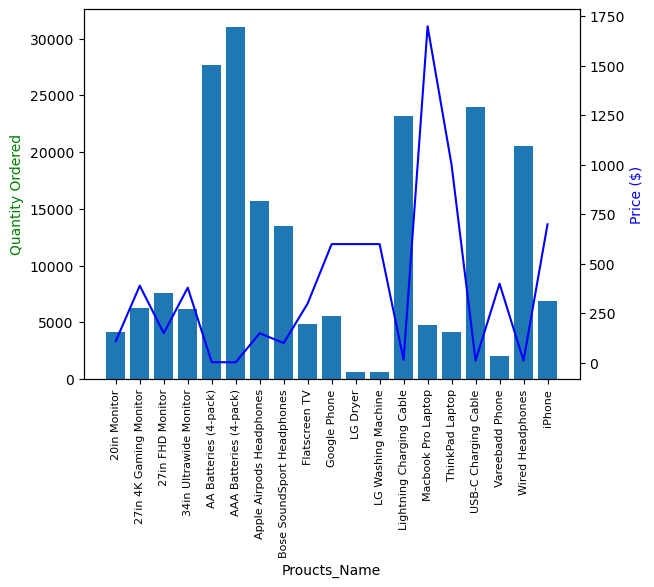

In [69]:
Price = df.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, Price, 'b-')
ax1.set_xlabel('Proucts_Name')
ax1.set_ylabel('Quantity Ordered', color = 'g')
ax2.set_ylabel('Price ($)', color = 'b')
ax1.set_xticklabels(products, rotation = 'vertical', size =8)

plt.show()

Insights from the graph
here we can see that the Batteries are high price products like LG Dryer
Compare to the other products thats here we can say that why batteries are the most sold products